In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential, Model
from keras.layers import Dense, Reshape, Conv2DTranspose, LeakyReLU, Conv2D, Dropout, Flatten, Input
from keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
np.random.seed(42)
tf.random.set_seed(42)

## Load Images

In [3]:
data_path = 'C:\\Users\\kaizi\\Desktop\\jupyter\\DeepLearning\\INDA\\'

# Define data generator
train_datagen = ImageDataGenerator(
    rescale=1./255,
)

train_generator = train_datagen.flow_from_directory(
    data_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode=None  # No labels required for GANs
)

Found 138 images belonging to 1 classes.


## Reload Generator and Discriminator

In [4]:
# Define constants
epochs = 120
batch_size = 32
codings_size = 100
save_interval = 100

In [5]:
from keras.models import load_model

generator = load_model('generator_model.keras')
discriminator = load_model('discriminator_model.keras')

# Recompile GAN
gan = Sequential()
gan.add(generator)
gan.add(discriminator)
# Use the same optimizer and loss used initially as original model
gan.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))  

In [6]:
from datetime import datetime

# Save generated images
def save_images(epoch, generator, examples=3, dim=(1, 5), figsize=(10, 10)):
    noise = np.random.normal(0, 1, (examples, 100))
    generated_images = generator.predict(noise)
    generated_images = 0.5 * generated_images + 0.5  # Rescale images 0 - 1
    
    plt.figure(figsize=figsize)
    for i in range(examples):
        plt.subplot(dim[0], dim[1], i + 1)
        plt.imshow(generated_images[i])
        plt.axis('off')
    plt.tight_layout()
    
    # Get the current date and time
    now = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
    filename = f'gan_generated_image_epoch_{epoch}_{now}.png'
    
    plt.savefig(filename)
    plt.close()

In [7]:
def load_data(generator, batch_size):
    X = []
    for _ in range(batch_size):
        img = next(generator)
        X.append(img[0])
    X = np.array(X)
    return X

In [8]:
# Training loop
for epoch in range(epochs):
    # Train Discriminator
    imgs = load_data(train_generator, batch_size)  # Load a batch of real images
    
    noise = np.random.normal(0, 1, (batch_size, 100))  # Generate noise for fake images
    gen_imgs = generator.predict(noise)  # Generate fake images using the generator

    valid = np.ones((batch_size, 1))  # Labels for real images
    fake = np.zeros((batch_size, 1))  # Labels for fake images
    
    d_loss_real = discriminator.train_on_batch(imgs, valid)  # Train discriminator on real images
    d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)  # Train discriminator on fake images
 
    d_loss = 0.5 * (d_loss_real + d_loss_fake)  # Calculate the average discriminator loss
   
    # Train Generator
    noise = np.random.normal(0, 1, (batch_size, 100))  # Generate noise for new fake images
    gan.train_on_batch(noise, valid)  # Train generator using the GAN model
   
    # Print progress
    print(f"Epoch {epoch + 1}: DESC loss: {d_loss}")
    
    # If at save interval, save generated image samples
    if epoch % save_interval == 0:
        save_images(epoch, generator, examples=5)

print("Training completed.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


C:\Users\kaizi\anaconda3\lib\site-packages\keras\src\backend\tensorflow\trainer.py:71: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


Epoch 1: DESC loss: 1.161576509475708
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
Epoch 2: DESC loss: 1.4386465549468994
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
Epoch 3: DESC loss: 1.4980518817901611
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
Epoch 4: DESC loss: 1.52435302734375
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
Epoch 5: DESC loss: 1.544111967086792
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step
Epoch 6: DESC loss: 1.5588934421539307
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step
Epoch 7: DESC loss: 1.5701457262039185
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step
Epoch 8: DESC loss: 1.580836534500122
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
Epoch 9: DESC loss: 1.5903195142745972
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
Epoch 10: DESC loss: 1.5986378192901611
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
Epoch 11: DESC loss: 1.6050288677215576
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
Epoch 12: DESC loss: 1.6112390756607056
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
Epoch 13: DESC loss: 1.6176

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
Epoch 61: DESC loss: 1.9434688091278076
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
Epoch 62: DESC loss: 1.9502203464508057
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
Epoch 63: DESC loss: 1.9573358297348022
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
Epoch 64: DESC loss: 1.9644184112548828
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
Epoch 65: DESC loss: 1.9712440967559814
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
Epoch 66: DESC loss: 1.978165626525879
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
Epoch 67: DESC loss: 1.985001802444458
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
Epoch 68: DESC loss: 1.9915850162506104
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
Epoch 69: DESC loss: 1.9981420040130615
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
Epoch 70: DESC loss: 2.0050158500671387
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step
Epoch 71: DESC loss: 2.011864185333252
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
Epoch 72: DESC loss: 2.0186519622802734
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
Epoch 73: DESC l

In [9]:
def generate_and_save_images(generator, examples=9):
    noise = np.random.normal(0, 1, (examples, 100))  # Generate noise
    gen_imgs = generator.predict(noise)  # Generate images using the generator

    fig, axs = plt.subplots(1, examples, figsize=(10, 10))
    for i in range(examples):
        img = gen_imgs[i, :, :, 0]  # Get the ith generated image
        img_rescaled = np.clip((img + 1) * 127.5, 0, 255).astype(np.uint8)  # Rescale image to [0, 255]
        img_rescaled = np.resize(img_rescaled, (176, 224))  # Resize image to 244x176

        axs[i].imshow(img_rescaled, cmap='gray')  # Display the image
        axs[i].axis('off')  # Hide axes
    
    plt.tight_layout()
    
    # Get the current date and time
    now = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
    filename = f'gan_generated_image_post_training_{epoch}_{now}.png'
    
    plt.savefig(filename)
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


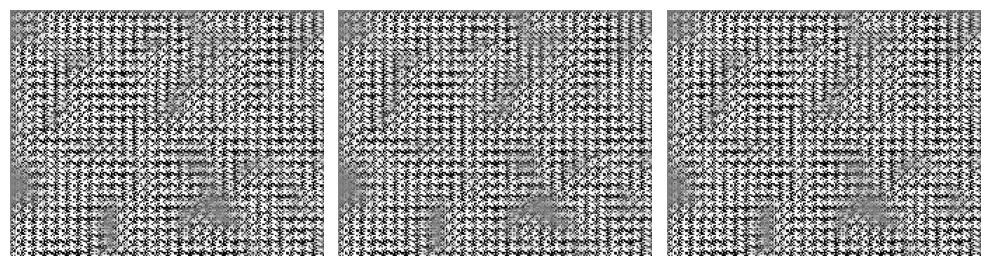

In [10]:
generate_and_save_images(generator, examples=3)

## Save Generator and Discriminator Model

In [11]:
generator.save('generator_model.keras')
discriminator.save('discriminator_model.keras')
gan.save('gan_model.keras')